<a href="https://colab.research.google.com/github/vconessa/Projeto-02---Composicao-IBOV---Setor-de-atua-o---Energia.ipynb/blob/main/Projeto_02_Composicao_IBOV_Setor_de_atua%C3%A7%C3%A3o_Energia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Composição IBOV
## Entendimento e análise das ações e seus pesos
 

IBOV 


1. Criado em 1968
2. Reavaliado a cada 4 meses 
3. Composto por ações (Ações PN - dividendos ou ON - votação) e units (Pacote que contem PN e ON)
4. Critérios são: Índice de negociabilidade IN (liquidez), presença de 95% dos pregões no ano e mínimo de 0,1% do volume financeiro do mercado a vista

https://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-amplos/ibovespa.htm

Composição IBOV consultado por setor de atuação 

https://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-amplos/indice-ibovespa-ibovespa-composicao-da-carteira.htm

Obtenção dos dados. -
Realizado download do arquivo em csv do índice IBOV através do site da B3 em 13/04/2023 

In [1]:
# Instalando bibliotecas

! pip install yfinance
! pip install plotly
! pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 2.7 MB/s eta 0:00:00


In [2]:
# Bibliotecas 

import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime
import mplfinance as mpf
from plotly.subplots import make_subplots


In [34]:
ibov = pd.read_csv("/content/IBOVDia_13-04-23.csv", encoding="ISO-8859-1", sep=";", header=1, index_col=False)
ibov.head()
# Modifiquei o arquivo csv, apenas tirando o cabeçalho e corrigi o erro de "Error tokenizing data"

,Setor,Código,Ação,Tipo,Qtde. Teórica,Part. (%),Part. (%)Acum.
0,Bens Indls / Máqs e Equips,WEGE3,WEG,ON NM,1.318.583.017,"2,789","2,789"
1,Bens Indls / Mat Transporte,EMBR3,EMBRAER,ON NM,734.632.205,"0,790","0,790"
2,Bens Indls/Transporte,AZUL4,AZUL,PN N2,327.646.296,"0,212","2,340"
3,Bens Indls/Transporte,CCRO3,CCR SA,ON NM,998.462.635,"0,701","2,340"
4,Bens Indls/Transporte,ECOR3,ECORODOVIAS,ON NM,310.103.685,"0,106","2,340"


In [35]:
ibov.isnull().sum()

Setor             0
Código            2
Ação              2
Tipo              2
Qtde. Teórica     0
Part. (%)         1
Part. (%)Acum.    1
dtype: int64

In [36]:
# Em reunião eu escolhi ficar com as empresa do setor de energia, vou realizar o filtro 
ibov['Setor'].value_counts()

Utilidade Públ / Energ Elétrica                      11
Financ e Outros / Interms Financs                     8
Petróleo/ Gás e Biocombustíveis                       7
Consumo Cíclico / Comércio                            6
Bens Indls/Transporte                                 5
Cons N  Básico / Alimentos Processados                5
Mats Básicos / Sid Metalurgia                         4
Saúde/SM Hosp An.Diag                                 4
Cons N Cíclico / Comércio Distr.                      3
Mats Básicos / Mineração                              3
Consumo Cíclico/Constr Civil                          3
Mats Básicos / Madeira e Papel                        3
Diversos                                              3
Financ e Outros / Explor Imóveis                      3
Tec.Informação/Programas Servs                        3
Financeiro e Outros/Serviços Financeiros Diversos     2
Telecomunicação                                       2
Saúde/Comércio Distr.                           

In [37]:
acoes_energia = ibov.groupby(['Setor']).get_group('Utilidade Públ / Energ Elétrica')
acoes_energia.head()

,Setor,Código,Ação,Tipo,Qtde. Teórica,Part. (%),Part. (%)Acum.
77,Utilidade Públ / Energ Elétrica,CMIG4,CEMIG,PN N1,1.442.098.974,"0,957","10,434"
78,Utilidade Públ / Energ Elétrica,CPLE6,COPEL,PNB N2,1.563.365.506,"0,635","10,434"
79,Utilidade Públ / Energ Elétrica,CPFE3,CPFL ENERGIA,ON NM,187.732.538,"0,335","10,434"
80,Utilidade Públ / Energ Elétrica,ELET3,ELETROBRAS,ON N1,1.871.213.500,"3,500","10,434"
81,Utilidade Públ / Energ Elétrica,ELET6,ELETROBRAS,PNB N1,275.526.814,"0,568","10,434"


In [38]:
acoes_energia.isnull().sum()

Setor             0
Código            0
Ação              0
Tipo              0
Qtde. Teórica     0
Part. (%)         0
Part. (%)Acum.    0
dtype: int64

In [ ]:
# Interpretando o df, entendi que o setor de "Utilidade Públ / Energ Elétrica" representa 10,434% do IBOV representado por 11 ações

In [39]:
acoes_energia.sort_values('Part. (%)',ascending=False, ignore_index=True, inplace=True)
acoes_energia

<ipython-input-39-7e88220402b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acoes_energia.sort_values('Part. (%)',ascending=False, ignore_index=True, inplace=True)


,Setor,Código,Ação,Tipo,Qtde. Teórica,Part. (%),Part. (%)Acum.
0,Utilidade Públ / Energ Elétrica,ELET3,ELETROBRAS,ON N1,1.871.213.500,"3,500","10,434"
1,Utilidade Públ / Energ Elétrica,EQTL3,EQUATORIAL,ON NM,1.100.513.485,"1,671","10,434"
2,Utilidade Públ / Energ Elétrica,CMIG4,CEMIG,PN N1,1.442.098.974,"0,957","10,434"
3,Utilidade Públ / Energ Elétrica,ENEV3,ENEVA,ON NM,1.576.898.490,"0,956","10,434"
4,Utilidade Públ / Energ Elétrica,CPLE6,COPEL,PNB N2,1.563.365.506,"0,635","10,434"
5,Utilidade Públ / Energ Elétrica,ENGI11,ENERGISA,UNT N2,248.477.689,"0,573","10,434"
6,Utilidade Públ / Energ Elétrica,ELET6,ELETROBRAS,PNB N1,275.526.814,"0,568","10,434"
7,Utilidade Públ / Energ Elétrica,EGIE3,ENGIE BRASIL,ON NM,255.208.461,"0,548","10,434"
8,Utilidade Públ / Energ Elétrica,TAEE11,TAESA,UNT N2,218.568.234,"0,404","10,434"
9,Utilidade Públ / Energ Elétrica,CPFE3,CPFL ENERGIA,ON NM,187.732.538,"0,335","10,434"


In [40]:
# Para utilziar a biblioteca yfinance é preciso adiconar .SA ao final dos tickers 

tickers = acoes_energia['Código']
list(tickers)

['ELET3',
 'EQTL3',
 'CMIG4',
 'ENEV3',
 'CPLE6',
 'ENGI11',
 'ELET6',
 'EGIE3',
 'TAEE11',
 'CPFE3',
 'ENBR3']

In [41]:
tickers_yf = []
for i in range (0,len(tickers)):
  tickers_yf.append(tickers[i]+'.SA')
tickers_yf

['ELET3.SA',
 'EQTL3.SA',
 'CMIG4.SA',
 'ENEV3.SA',
 'CPLE6.SA',
 'ENGI11.SA',
 'ELET6.SA',
 'EGIE3.SA',
 'TAEE11.SA',
 'CPFE3.SA',
 'ENBR3.SA']

In [54]:
# Utilzando a biblioteca yfiannce vamos coletar informações de preço dos ativos para criar df único
df = yf.download(tickers_yf, period='ytd', rounding=True)['Close']
df.head()

[*********************100%***********************]  11 of 11 completed


,CMIG4.SA,CPFE3.SA,CPLE6.SA,EGIE3.SA,ELET3.SA,ELET6.SA,ENBR3.SA,ENEV3.SA,ENGI11.SA,EQTL3.SA,TAEE11.SA
Date,,,,,,,,,,,
2023-01-02,10.91,32.19,7.64,37.32,40.59,42.02,20.46,11.20,42.69,26.19,34.32
2023-01-03,10.65,31.79,7.50,36.98,39.83,41.42,19.15,11.03,42.08,25.55,33.96
2023-01-04,10.78,32.16,7.71,37.00,40.90,42.50,19.62,11.45,41.54,25.60,33.92
2023-01-05,10.88,32.20,7.65,36.76,40.98,42.30,19.57,11.71,41.50,25.68,34.06
2023-01-06,10.88,31.86,7.54,36.87,41.00,42.20,19.55,12.38,41.29,25.60,35.37


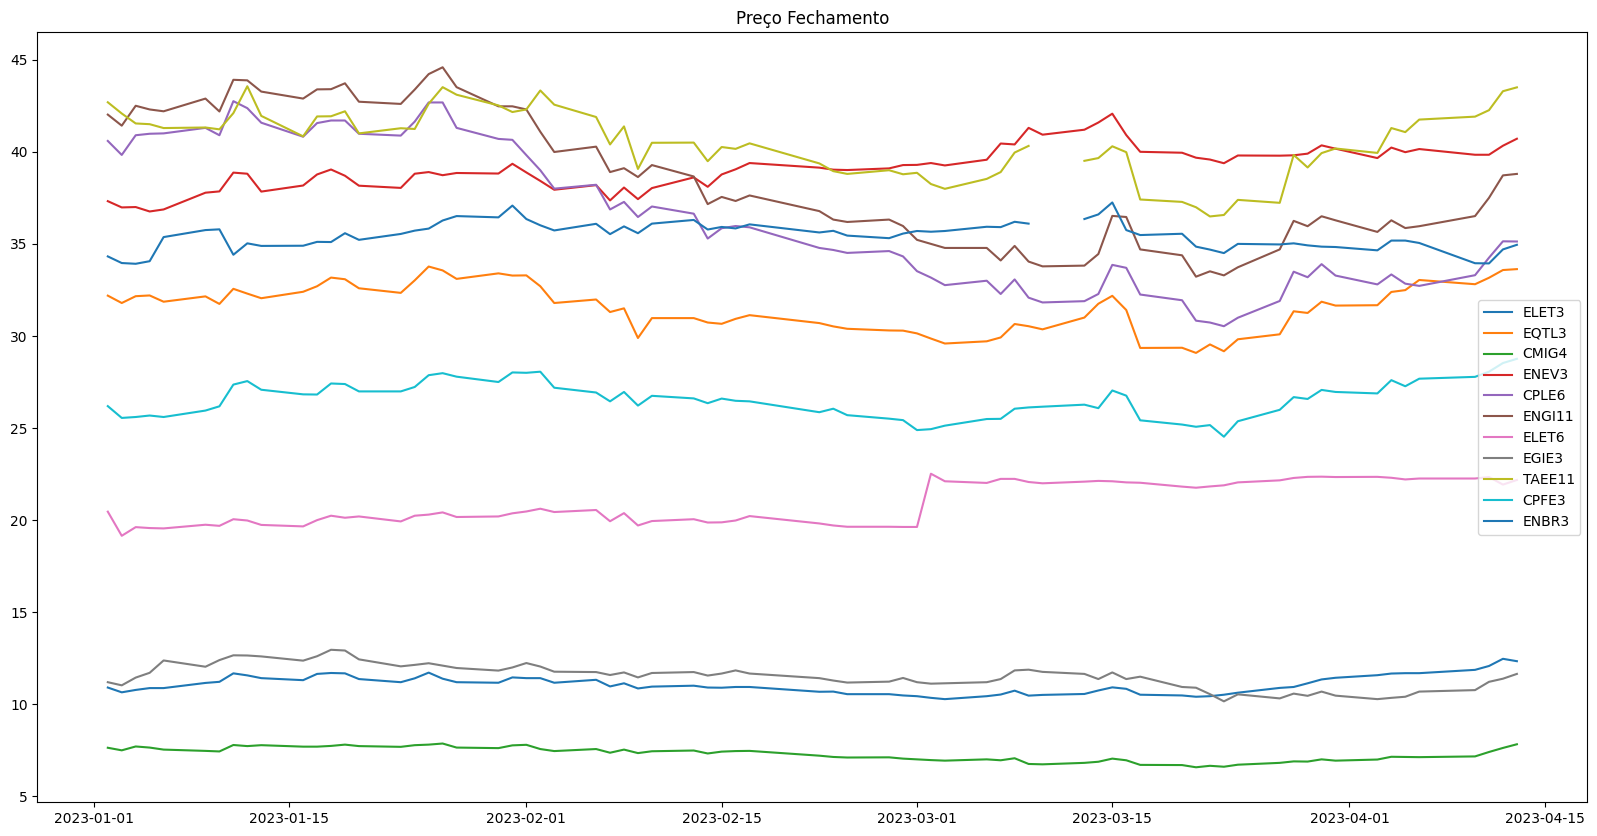

In [52]:
# Melhorar a qualidade do gráfico - Organizar legenda e cores das linha na sequência 
plt.figure(figsize=(20,10))
plt.title('Preço Fechamento')
plt.plot(df)
plt.legend(tickers)
plt.show( )

In [57]:
# Normalização usando escalonamento de recurso min-max 
df_normalizado = df.copy()
for c in df_normalizado:
  df_normalizado[c] = (df_normalizado[c] - df_normalizado[c].min()) / (df_normalizado[c].max() - df_normalizado[c].min())
df_normalizado.head()

,CMIG4.SA,CPFE3.SA,CPLE6.SA,EGIE3.SA,ELET3.SA,ELET6.SA,ENBR3.SA,ENEV3.SA,ENGI11.SA,EQTL3.SA,TAEE11.SA
Date,,,,,,,,,,,
2023-01-02,0.287671,0.663113,0.821705,0.105461,0.823241,0.773967,0.388724,0.371429,0.876945,0.392435,0.120120
2023-01-03,0.168950,0.577825,0.713178,0.041431,0.761047,0.721196,0.000000,0.310714,0.790665,0.241135,0.012012
2023-01-04,0.228311,0.656716,0.875969,0.045198,0.848609,0.816183,0.139466,0.460714,0.714286,0.252955,0.000000
2023-01-05,0.273973,0.665245,0.829457,0.000000,0.855155,0.798593,0.124629,0.553571,0.708628,0.271868,0.042042
2023-01-06,0.273973,0.592751,0.744186,0.020716,0.856792,0.789798,0.118694,0.792857,0.678925,0.252955,0.435435


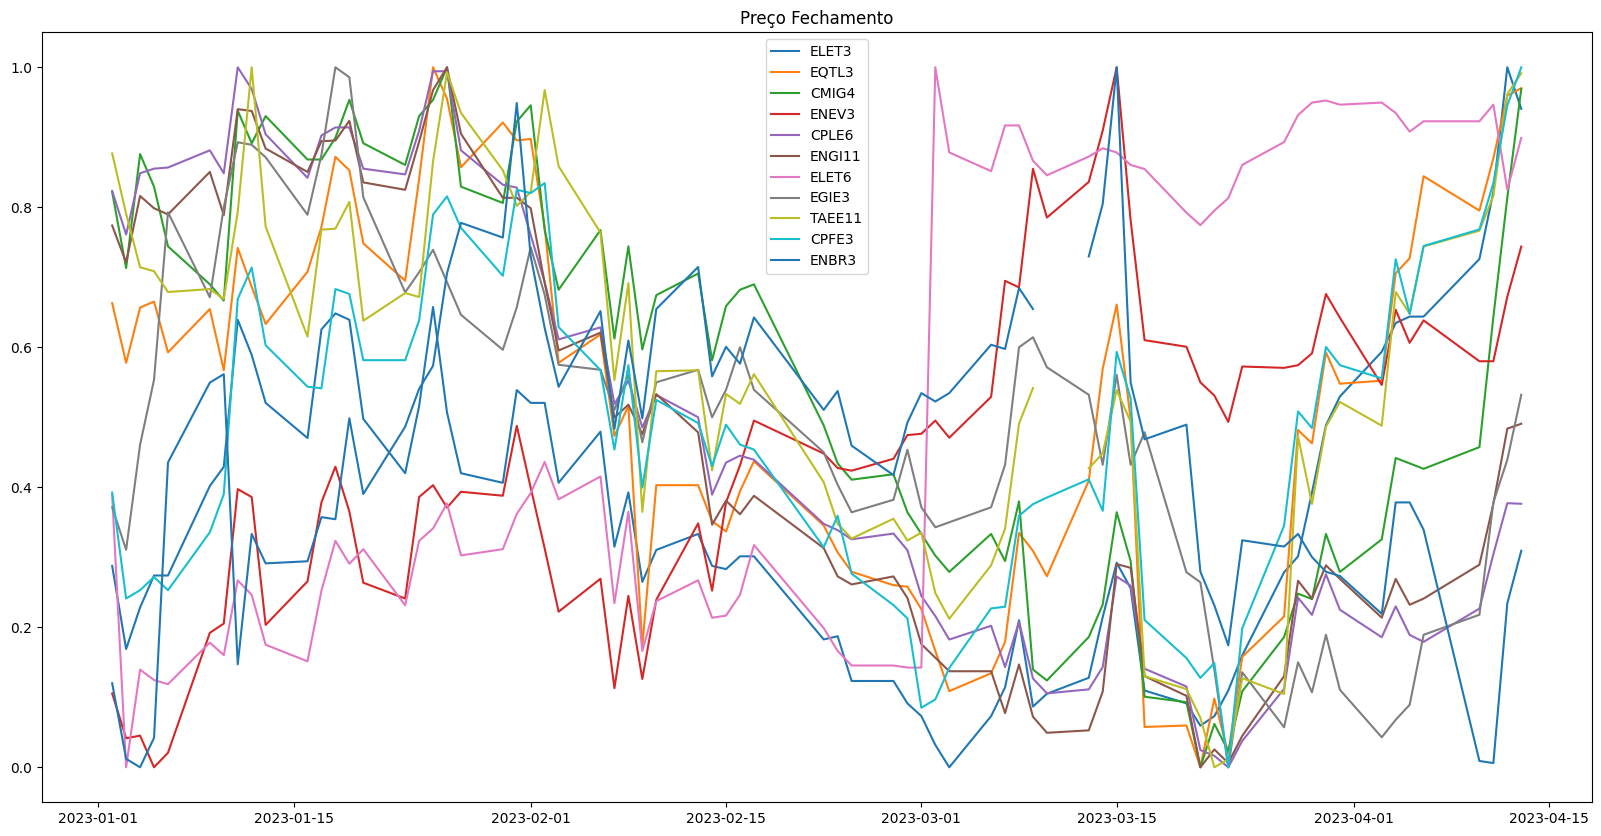

In [58]:
# Grafico com preços normalizados
plt.figure(figsize=(20,10))
plt.title('Preço Fechamento')
plt.plot(df_normalizado)
plt.legend(tickers)
plt.show( )

In [60]:
df.describe()

,CMIG4.SA,CPFE3.SA,CPLE6.SA,EGIE3.SA,ELET3.SA,ELET6.SA,ENBR3.SA,ENEV3.SA,ENGI11.SA,EQTL3.SA,TAEE11.SA
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,70.000000,71.000000,70.000000
mean,11.074789,31.546901,7.298732,39.150986,36.347606,38.465775,20.899155,11.529296,40.521000,26.565915,35.444429
std,0.495857,1.279790,0.376703,1.156494,3.855565,3.559779,1.107668,0.679967,1.819083,0.970456,0.728955
min,10.280000,29.080000,6.580000,36.760000,30.530000,33.220000,19.150000,10.160000,36.490000,24.530000,33.920000
25%,10.665000,30.525000,6.985000,38.305000,33.120000,35.755000,19.935000,11.160000,39.205000,25.780000,34.955000
50%,10.960000,31.740000,7.370000,39.100000,35.140000,37.500000,20.420000,11.590000,40.495000,26.600000,35.555000
75%,11.420000,32.525000,7.645000,39.870000,40.760000,42.300000,22.100000,11.985000,41.927500,27.250000,35.917500
max,12.470000,33.770000,7.870000,42.070000,42.750000,44.590000,22.520000,12.960000,43.560000,28.760000,37.250000


# Observando os dados entendi que quanto maior o desvio padrão do preço de uma ação, maior sua oscilação. Levando em consideração de que "fazer" dinheiro no mercado está em entender os movimentos, podemos levantar a hipotese de que ações com maior desvio padrão são melhores para curto/médio prazo e ações com desvio padrão menor são melhores para médio/longo prazo ? Como achar esse parâmetro ? 

In [65]:
# Gráfico com menor desvio padrão
close = df
ticker = str(input('Ticker: '))
px.histogram(close, x=ticker, nbins=30)

Ticker: CPLE6.SA


# Estudar distribuição normal e a assimetria das curvas (função skew e scipy)

In [66]:
# Gráfico com maior desvio padrão
close = df
ticker = str(input('Ticker: '))
px.histogram(close, x=ticker, nbins=30)

Ticker: ELET3.SA


Com desvio padrão maior o gráfico tende a uma simetria normal

In [67]:
for i in range (0,len(tickers_yf)):
  print(i, tickers_yf[i])

0 ELET3.SA
1 EQTL3.SA
2 CMIG4.SA
3 ENEV3.SA
4 CPLE6.SA
5 ENGI11.SA
6 ELET6.SA
7 EGIE3.SA
8 TAEE11.SA
9 CPFE3.SA
10 ENBR3.SA


In [69]:
# Download da açao escolhida utilizar o código correspondete da ação 
acao = yf.download(tickers_yf[4], period='ytd')

acao.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,7.81,7.90,7.57,7.64,7.64,5561000
2023-01-03,7.64,7.70,7.45,7.50,7.50,13813800
2023-01-04,7.63,7.90,7.55,7.71,7.71,16913300
2023-01-05,7.74,7.74,7.49,7.65,7.65,11903000
2023-01-06,7.65,7.70,7.46,7.54,7.54,14056200


In [70]:

# Criando o indicador média movel e adicionando no dataframe
acao['MMS20'] = acao['Close'].rolling(window=20).mean()
acao.head()

,Open,High,Low,Close,Adj Close,Volume,MMS20
Date,,,,,,,
2023-01-02,7.81,7.90,7.57,7.64,7.64,5561000,NaN
2023-01-03,7.64,7.70,7.45,7.50,7.50,13813800,NaN
2023-01-04,7.63,7.90,7.55,7.71,7.71,16913300,NaN
2023-01-05,7.74,7.74,7.49,7.65,7.65,11903000,NaN
2023-01-06,7.65,7.70,7.46,7.54,7.54,14056200,NaN


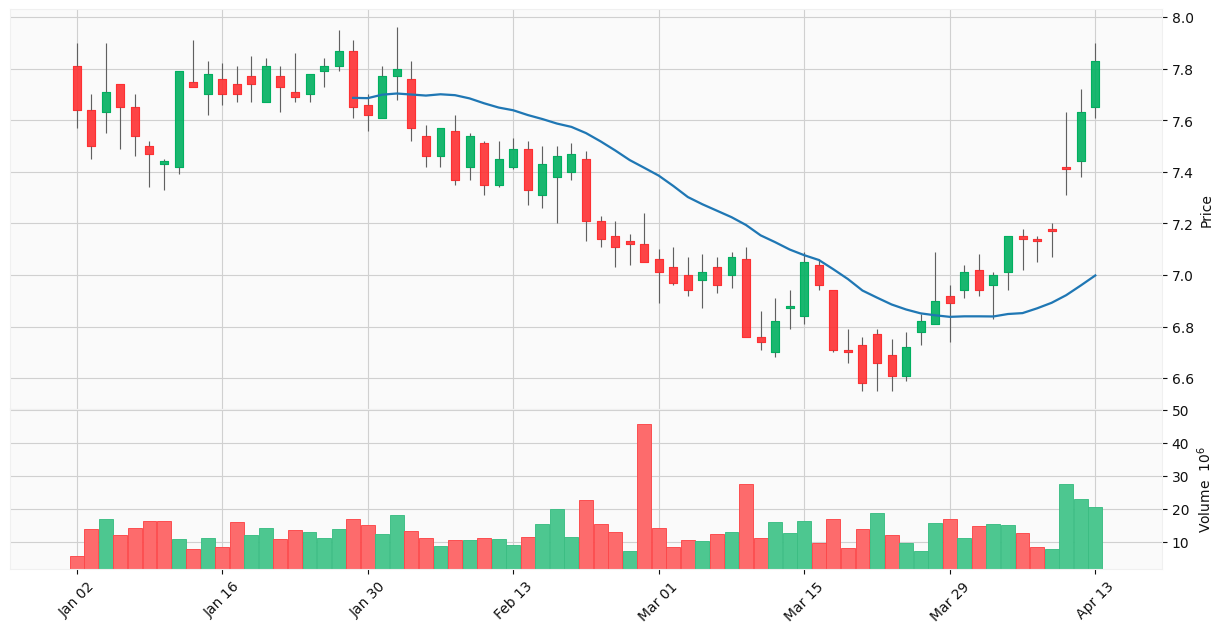

In [71]:
mpf.plot(acao, type = 'candle', figsize=(16,8), volume=True, mav=(20), style='yahoo')